In [1]:
import os
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from utils import nn_utils, nn_architectures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from dieboldmariano import dm_test
import matplotlib.dates as mdates

%load_ext autoreload
%autoreload 2

/Users/kabirkumar/opt/anaconda3/envs/PraktikumMLCMS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# project_path = os.path.dirname(os.path.abspath(os.getcwd())) #85
dataset_path_NO_AT = os.path.join("datasets", "DE_EPF_dataset.csv")
dataset_path_WITH_AT = os.path.join("datasets", "DE_AT_EPF_dataset.csv")

dataset_no_at = pd.read_csv(dataset_path_NO_AT, parse_dates=['Date'])
dataset_w_at = pd.read_csv(dataset_path_WITH_AT, parse_dates=['Date'])

hyper_params_w_at = {'input_dims': 146, 'output_dims': 48}
hyper_params_no_at = {'input_dims': 72, 'output_dims': 24}

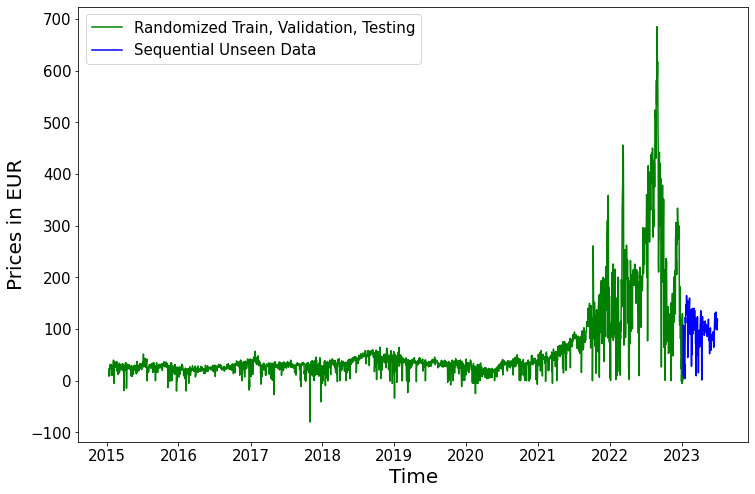

In [3]:
fig, ax = plt.subplots(figsize = (12,8))

# fig.figure(figsize=(15,5))
ax.plot(dataset_w_at[dataset_w_at['Date'] < '2023-01-06']['Date'], dataset_w_at[dataset_w_at['Date'] < '2023-01-06']['DE_H0'], c = "green", label = "Randomized Train, Validation, Testing")
ax.plot(dataset_w_at[dataset_w_at['Date'] >= '2023-01-06']['Date'], dataset_w_at[dataset_w_at['Date'] >= '2023-01-06']['DE_H0'], c = "blue", label = "Sequential Unseen Data")

# ax.title.set_text("Electricity Prices in Germany for $1^{st}$ hour")
# fig.suptitle("Electricity Prices in Germany for $1^{st}$ hour", fontsize=20)
ax.set_ylabel("Prices in EUR", fontsize = 20)
ax.set_xlabel("Time", fontsize = 20)
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# plt.annotate(text='TERI AMMA KI CHUT', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
# plt.annotate(text='', xy=(mdates.date2num(dataset_w_at[dataset_w_at['Date'] < '2023-01-06']['Date']),dataset_w_at[dataset_w_at['Date'] < '2023-01-06']['DE_H0']), arrowprops=dict(arrowstyle='<->'))
ax.legend(fontsize="15")
plt.savefig("Oth_hr_DE_price")

In [4]:
dataset_w_at

,Date,DE_d-1_H0,DE_d-1_H1,DE_d-1_H2,DE_d-1_H3,DE_d-1_H4,DE_d-1_H5,DE_d-1_H6,DE_d-1_H7,DE_d-1_H8,...,DE_H14,DE_H15,DE_H16,DE_H17,DE_H18,DE_H19,DE_H20,DE_H21,DE_H22,DE_H23
0,2015-01-12,0.05,-2.06,-4.11,-5.06,-4.12,-0.74,-25.02,-16.94,-6.86,...,28.98,29.49,28.99,34.41,31.69,29.59,27.61,15.55,14.91,9.10
1,2015-01-13,9.30,2.87,0.09,0.26,2.83,10.40,20.03,44.95,44.92,...,25.62,28.91,34.13,42.16,41.99,37.91,31.41,29.91,27.02,18.36
2,2015-01-14,9.27,10.42,11.16,10.71,11.26,11.69,21.05,32.37,34.21,...,30.63,35.61,37.80,44.69,43.23,34.51,29.44,27.96,23.73,16.29
3,2015-01-15,13.25,15.02,11.99,13.68,13.91,16.26,27.32,31.62,34.74,...,26.53,28.21,29.37,32.54,32.67,30.49,28.32,22.05,19.01,12.01
4,2015-01-16,24.36,21.59,15.46,15.44,15.43,15.47,27.69,33.89,34.79,...,41.83,44.05,47.10,52.49,53.54,48.02,41.51,37.92,35.64,28.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,2023-06-26,121.06,113.00,107.95,106.49,101.89,101.93,88.66,79.37,54.00,...,50.93,54.03,64.32,83.48,97.00,109.43,118.00,126.16,129.37,118.06
3088,2023-06-27,119.09,108.63,95.60,89.48,87.63,101.97,128.00,132.05,120.58,...,68.12,77.95,89.05,96.40,113.57,130.41,134.79,130.83,125.06,116.16
3089,2023-06-28,114.23,100.78,93.22,94.12,89.27,92.17,115.29,130.00,127.05,...,95.59,95.39,97.60,107.08,128.92,155.18,167.62,159.10,140.00,121.10
3090,2023-06-29,98.08,90.59,87.09,86.29,87.24,94.39,116.03,131.50,128.15,...,98.60,100.00,101.12,112.03,131.26,166.25,171.58,154.73,141.81,121.11


In [5]:
# minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))
# plt.plot(dataset_w_at[dataset_w_at['Date'] < '2021-01-01']['Date'], np.array(dataset_w_at[dataset_w_at['Date'] < '2021-01-01']['DE_H21']))

In [6]:
unseen_w_at = dataset_w_at[dataset_w_at['Date'] >= '2023-01-06']
dataset_w_at = dataset_w_at[dataset_w_at['Date'] < '2023-01-06']

unseen_no_at = dataset_no_at[dataset_no_at['Date'] >= '2023-01-06']
dataset_no_at = dataset_no_at[dataset_no_at['Date'] < '2023-01-06']

dataset_w_at = dataset_w_at.drop(['Date'], axis = 1)
dataset_no_at = dataset_no_at.drop(['Date'], axis = 1)

dates_final_preds = unseen_w_at['Date']
unseen_w_at = unseen_w_at.drop(['Date'], axis = 1)
unseen_no_at = unseen_no_at.drop(['Date'], axis = 1)

In [7]:
dataset_w_at

,DE_d-1_H0,DE_d-1_H1,DE_d-1_H2,DE_d-1_H3,DE_d-1_H4,DE_d-1_H5,DE_d-1_H6,DE_d-1_H7,DE_d-1_H8,DE_d-1_H9,...,DE_H14,DE_H15,DE_H16,DE_H17,DE_H18,DE_H19,DE_H20,DE_H21,DE_H22,DE_H23
0,0.05,-2.06,-4.11,-5.06,-4.12,-0.74,-25.02,-16.94,-6.86,1.53,...,28.98,29.49,28.99,34.41,31.69,29.59,27.61,15.55,14.91,9.10
1,9.30,2.87,0.09,0.26,2.83,10.40,20.03,44.95,44.92,36.33,...,25.62,28.91,34.13,42.16,41.99,37.91,31.41,29.91,27.02,18.36
2,9.27,10.42,11.16,10.71,11.26,11.69,21.05,32.37,34.21,28.47,...,30.63,35.61,37.80,44.69,43.23,34.51,29.44,27.96,23.73,16.29
3,13.25,15.02,11.99,13.68,13.91,16.26,27.32,31.62,34.74,32.41,...,26.53,28.21,29.37,32.54,32.67,30.49,28.32,22.05,19.01,12.01
4,24.36,21.59,15.46,15.44,15.43,15.47,27.69,33.89,34.79,30.90,...,41.83,44.05,47.10,52.49,53.54,48.02,41.51,37.92,35.64,28.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,-0.03,-0.07,-0.03,-0.04,-0.03,-0.02,-0.01,-0.05,0.63,-0.03,...,0.85,23.53,36.54,46.03,55.57,54.95,49.23,44.99,45.96,35.00
2912,-5.17,-1.07,-1.47,-5.08,-4.49,-5.40,-5.02,-1.30,-1.44,-1.09,...,148.20,155.34,162.89,170.00,174.74,164.46,153.00,141.67,134.91,124.22
2913,57.91,51.67,52.93,44.09,50.08,69.72,105.08,140.64,145.98,147.05,...,163.06,167.73,166.61,170.72,168.93,160.99,149.62,130.99,114.27,93.66
2914,130.01,120.00,118.76,115.00,113.63,116.27,138.92,159.92,169.17,171.18,...,80.22,79.74,80.82,86.16,72.28,66.61,43.20,31.25,34.96,9.09


In [8]:
data_train_w_at, data_test_w_at = train_test_split(dataset_w_at, train_size = 0.8, shuffle = True, random_state = 42)
data_train_no_at, data_test_no_at = train_test_split(dataset_no_at, train_size = 0.8, shuffle = True, random_state = 42)

#scale the data to [-1,1]
minmax_scale_w_at = preprocessing.MinMaxScaler(feature_range=(-1, 1))
minmax_scale_no_at = preprocessing.MinMaxScaler(feature_range=(-1, 1))

# minmax_scale = preprocessing.StandardScaler()

data_train_w_at = minmax_scale_w_at.fit_transform(data_train_w_at)
data_test_w_at = minmax_scale_w_at.transform(data_test_w_at)

data_train_no_at = minmax_scale_no_at.fit_transform(data_train_no_at)
data_test_no_at = minmax_scale_no_at.transform(data_test_no_at)

arch_w_at = nn_architectures.get_arch(hyper_params_w_at, [320,200])
arch_no_at = nn_architectures.get_arch(hyper_params_no_at, [320,200])

unseen_w_at = minmax_scale_w_at.transform(unseen_w_at)
unseen_no_at = minmax_scale_no_at.transform(unseen_no_at)

In [9]:
output_no_at = nn_utils.main(data_train_no_at, data_test_no_at, hyper_params_no_at, arch_no_at)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=72, out_features=320, bias=True)
Reset trainable parameters of layer = Linear(in_features=320, out_features=200, bias=True)
Reset trainable parameters of layer = Linear(in_features=200, out_features=24, bias=True)
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37

In [10]:
output_w_at = nn_utils.main(data_train_w_at, data_test_w_at, hyper_params_w_at, arch_w_at)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=146, out_features=320, bias=True)
Reset trainable parameters of layer = Linear(in_features=320, out_features=200, bias=True)
Reset trainable parameters of layer = Linear(in_features=200, out_features=48, bias=True)
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 3

In [11]:
output_no_at

{'tr': 0.025756752118468285,
 'val': 0.03560087426255147,
 'test': 0.03812022721394896,
 'models': [nn_net(
    (layers): Sequential(
      (0): Linear(in_features=72, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=24, bias=True)
    )
  ),
  nn_net(
    (layers): Sequential(
      (0): Linear(in_features=72, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=24, bias=True)
    )
  )]}

In [12]:
output_w_at

{'tr': 0.0333234453573823,
 'val': 0.031307002167320915,
 'test': 0.033228724356740715,
 'models': [nn_net(
    (layers): Sequential(
      (0): Linear(in_features=146, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=48, bias=True)
    )
  ),
  nn_net(
    (layers): Sequential(
      (0): Linear(in_features=146, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=48, bias=True)
    )
  )]}

In [13]:
preds_no_at = nn_utils.get_preds(unseen_no_at, output_no_at['models'][-1], hyper_params_no_at)
preds_w_at = nn_utils.get_preds(unseen_w_at, output_w_at['models'][-1], hyper_params_w_at)

In [14]:
preds_no_at = preds_no_at.reshape(preds_no_at.shape[0], preds_no_at.shape[-1])
preds_w_at = preds_w_at.reshape(preds_w_at.shape[0], preds_w_at.shape[-1])

result_no_at = np.zeros(unseen_no_at.shape)
result_w_at = np.zeros(unseen_w_at.shape)

result_no_at[:,-hyper_params_no_at['output_dims']:] = preds_no_at
result_w_at[:,-hyper_params_w_at['output_dims']:] = preds_w_at

In [15]:
unseen_w_at = minmax_scale_w_at.inverse_transform(unseen_w_at)
result_w_at = minmax_scale_w_at.inverse_transform(result_w_at)

unseen_no_at = minmax_scale_no_at.inverse_transform(unseen_no_at)
result_no_at = minmax_scale_no_at.inverse_transform(result_no_at)

Text(0.04, 0.5, 'Electricity Price')

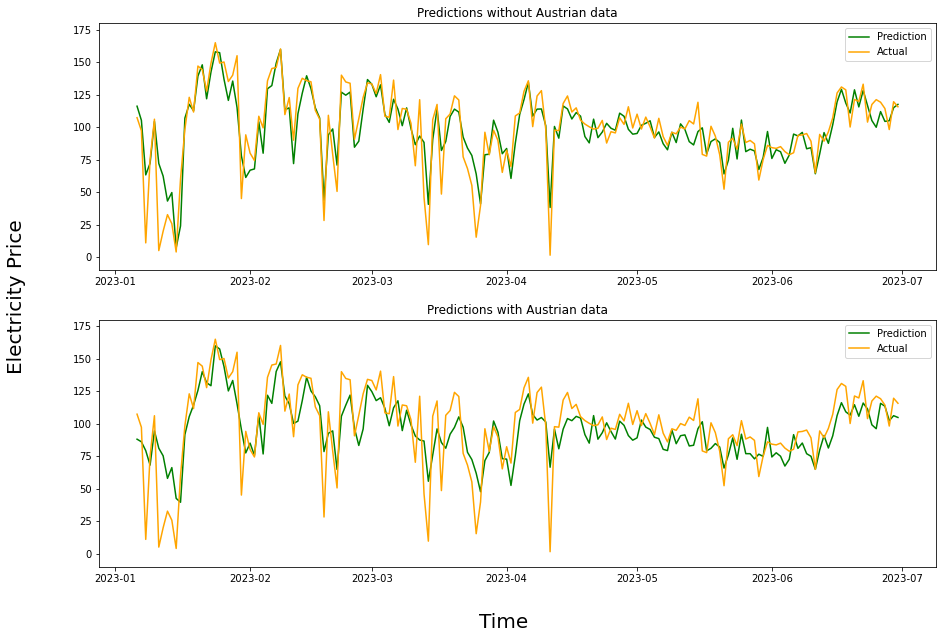

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))

# fig.figure(figsize=(15,5))
ax[0].plot(dates_final_preds, result_no_at[:,-24], c = 'green', label = "Prediction")
ax[0].plot(dates_final_preds, unseen_no_at[:,-24], c = 'orange', label = "Actual")
ax[0].axis(ymin=-10,ymax=180)
ax[0].title.set_text("Predictions without Austrian data")
ax[0].legend()

ax[1].plot(dates_final_preds, result_w_at[:,-24], c = 'green', label = "Prediction")
ax[1].plot(dates_final_preds, unseen_w_at[:,-24], c = 'orange', label = "Actual")
# ax[1].axis(xmin=-10,xmax=180)
ax[1].axis(ymin=-10,ymax=180)
ax[1].title.set_text("Predictions with Austrian data")
ax[1].legend()

fig.text(0.5, 0.04, 'Time', ha='center', fontsize = 20)
fig.text(0.04, 0.5, 'Electricity Price', va='center', rotation='vertical', fontsize = 20)


In the one-sided Diebold-Mariano test, the hypotheses are formulated to test if one model is significantly better (or worse) than the other in terms of forecast accuracy in a specific direction. The hypotheses can be stated as follows:

Null Hypothesis (H0): The forecast accuracy of Model A is not significantly better (or worse) than Model B in the specified direction.

Alternative Hypothesis (HA): The forecast accuracy of Model A is significantly better (or worse) than Model B in the specified direction.

The directional assumption mentioned in the previous response guides the formulation of the hypotheses. For example:

For testing if Model A is expected to have lower forecast errors (one-sided lower-tail test):

H0: The forecast accuracy of Model A is not significantly better than Model B.
HA: The forecast accuracy of Model A is significantly better than Model B.

For testing if Model A is expected to have higher forecast errors (one-sided upper-tail test):

H0: The forecast accuracy of Model A is not significantly worse than Model B.
HA: The forecast accuracy of Model A is significantly worse than Model B.

The hypotheses can be tested using appropriate statistical tests, such as the one-sample t-test or paired t-test, with the difference in forecast errors between the two models as the test statistic. The critical values for the test can be obtained from the corresponding t-distribution or by using appropriate statistical software.

It's worth noting that the specific direction of the test should be based on prior expectations or theoretical justifications, rather than simply selecting the direction based on the results of a preliminary analysis.

In [17]:
# H0: Predicitions are similar
# HA: Predicitions are not similar

results = []
for i in range(-24,0):
    # print(i)
    res = dm_test(unseen_w_at[:,i], result_w_at[:,i], result_no_at[:,i], one_sided=False)
    results.append(res[1])
    if res[1] <= 0.05:
        print('Not Similar', res)
    else:
        print('Similar', res)

Not Similar (5.684171686182166, 5.4028918052227814e-08)
Not Similar (5.209523366326052, 5.280144139245676e-07)
Not Similar (3.29340074280058, 0.0011977862196351754)
Not Similar (2.998288503532496, 0.003110414813961135)
Not Similar (3.1758782987433554, 0.0017657376377479999)
Not Similar (3.6707464756309, 0.0003209462619150273)
Similar (1.9666310588100446, 0.05080701414828795)
Similar (0.4876641401805733, 0.6263981301628079)
Similar (-0.07154763317342945, 0.9430436172957201)
Similar (-1.949070953465063, 0.05288564636185815)
Not Similar (-2.9924661976742595, 0.003167372971958357)
Not Similar (-3.868782651457405, 0.00015413437733352323)
Not Similar (-5.103875506995781, 8.613790249972224e-07)
Not Similar (-5.598879498919301, 8.215616811184207e-08)
Not Similar (-5.029279725773483, 1.2119753287959002e-06)
Not Similar (-2.2376536071852735, 0.026505323304740497)
Not Similar (-2.7652269863937833, 0.006298476786803895)
Similar (-1.0347324235560516, 0.30222164208126123)
Similar (0.3042080106340919

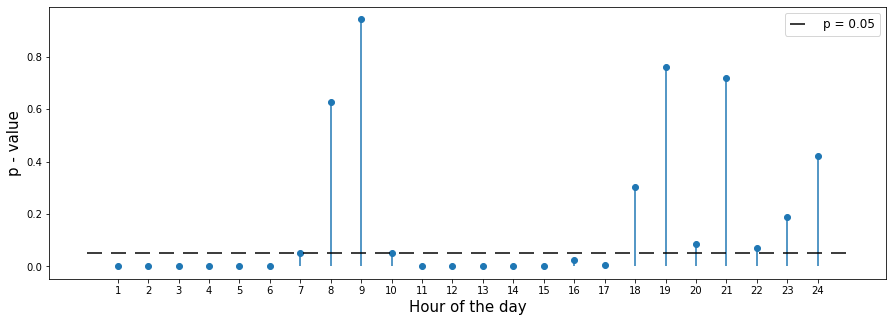

In [18]:
plt.figure(figsize = (15,5))
plt.stem(range(1,25), results, basefmt = " ")
# plt.ylim(0)
# plt.hlines(y = 0.05, xmin = 1, xmax = 24, colors = "black", linestyles = "--", dashes=(5, 1))
plt.plot([0, 25], [0.05, 0.05], linestyle='--', dashes=(10, 6), c = "black", label = "p = 0.05") #length of 5, space of 1
plt.xticks(range(1,25))
plt.xlabel("Hour of the day", fontsize = "15")
plt.ylabel("p - value", fontsize = "15")
plt.legend(fontsize = "12")
# plt.title("Two-Sided Diebold Mariano Test")
plt.show()

In [19]:
# H0: The forecast accuracy of Model A (With Austrian Data) is not significantly better than Model B (Without Austrian Data)
# HA: The forecast accuracy of Model A (With Austrian Data) is significantly better than Model B ((Without Austrian Data))

results1 = []
for i in range(-24,0):
    # print(i)
    res = dm_test(unseen_w_at[:,i], result_w_at[:,i], result_no_at[:,i], one_sided=True)
    results1.append(res[1])
    if res[1] <= 0.05:
        print('With Austrian Data model is significantly better', res)
    else: 
        print('With Austrian Data model is not significantly better', res)

With Austrian Data model is not significantly better (5.684171686182166, 0.999999972985541)
With Austrian Data model is not significantly better (5.209523366326052, 0.999999735992793)
With Austrian Data model is not significantly better (3.29340074280058, 0.9994011068901825)
With Austrian Data model is not significantly better (2.998288503532496, 0.9984447925930194)
With Austrian Data model is not significantly better (3.1758782987433554, 0.999117131181126)
With Austrian Data model is not significantly better (3.6707464756309, 0.9998395268690425)
With Austrian Data model is not significantly better (1.9666310588100446, 0.974596492925856)
With Austrian Data model is not significantly better (0.4876641401805733, 0.6868009349185961)
With Austrian Data model is not significantly better (-0.07154763317342945, 0.47152180864786003)
With Austrian Data model is significantly better (-1.949070953465063, 0.026442823180929075)
With Austrian Data model is significantly better (-2.9924661976742595, 

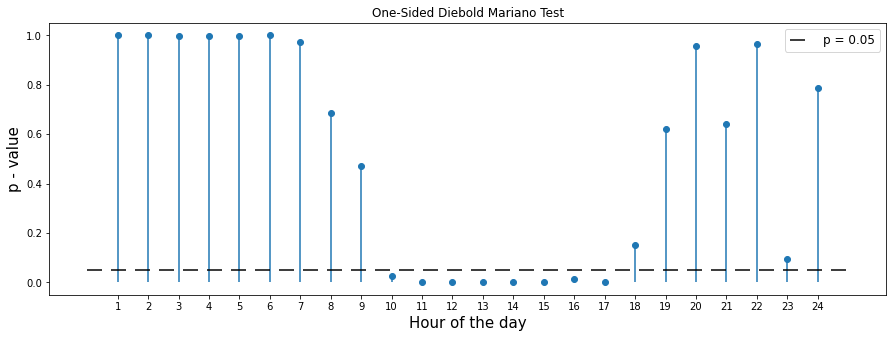

In [20]:
plt.figure(figsize = (15,5))
plt.stem(range(1,25), results1, basefmt = " ")
# plt.ylim(0)
# plt.hlines(y = 0.05, xmin = 1, xmax = 24, colors = "black", linestyles = "--", dashes=(5, 1))
plt.plot([0, 25], [0.05, 0.05], linestyle='--', dashes=(10, 6), c = "black", label = "p = 0.05") #length of 5, space of 1
plt.xticks(range(1,25))
plt.legend(fontsize = "12")
plt.xlabel("Hour of the day", fontsize = "15")
plt.ylabel("p - value", fontsize = "15")
plt.title("One-Sided Diebold Mariano Test")
plt.show()